In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import ModelCheckpoint
import os

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
credit_df = pd.read_csv( r'C:\Users\rajan\Downloads\german-credit.data', delim_whitespace = True, header = None)

In [4]:
credit_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
1,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
2,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
3,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
4,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1


In [5]:
columns = ['checkin_acc', 'duration', 'credit_history', 'purpose', 'amount',
           'saving_acc', 'present_emp_since', 'inst_rate', 'personal_status',
           'other_debtors', 'residing_since', 'property', 'age',
           'inst_plans', 'housing', 'num_credits',
           'job', 'dependents', 'telephone', 'foreign_worker', 'Credit_Risk_Status']

In [6]:
credit_df.columns = columns

In [7]:
credit_df = pd.get_dummies(credit_df, drop_first = True)
credit_df

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,Credit_Risk_Status,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
0,1,4,7,10,12,15,17,20,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,1169,4,4,67,2,1,1,1,0,...,1,0,0,0,1,0,0,1,1,0
2,48,5951,2,2,22,1,1,2,0,1,...,1,0,0,0,1,0,1,0,1,0
3,12,2096,2,3,49,1,2,1,0,0,...,1,0,0,1,0,0,1,0,1,0
4,42,7882,2,4,45,1,2,1,1,0,...,0,1,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,12,1736,3,4,31,1,1,1,0,0,...,1,0,0,1,0,0,1,0,1,0
997,30,3857,4,4,40,1,1,1,1,0,...,1,0,0,0,0,1,0,1,1,0
998,12,804,4,4,38,1,1,1,0,0,...,1,0,0,0,1,0,1,0,1,0
999,45,1845,4,4,23,1,1,2,1,0,...,0,1,0,0,1,0,0,1,1,0


In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   duration               1001 non-null   int64
 1   amount                 1001 non-null   int64
 2   inst_rate              1001 non-null   int64
 3   residing_since         1001 non-null   int64
 4   age                    1001 non-null   int64
 5   num_credits            1001 non-null   int64
 6   dependents             1001 non-null   int64
 7   Credit_Risk_Status     1001 non-null   int64
 8   checkin_acc_A11        1001 non-null   uint8
 9   checkin_acc_A12        1001 non-null   uint8
 10  checkin_acc_A13        1001 non-null   uint8
 11  checkin_acc_A14        1001 non-null   uint8
 12  credit_history_A30     1001 non-null   uint8
 13  credit_history_A31     1001 non-null   uint8
 14  credit_history_A32     1001 non-null   uint8
 15  credit_history_A33     1001 non-null  

In [9]:
credit_df.describe()

,duration,amount,inst_rate,residing_since,age,num_credits,dependents,Credit_Risk_Status,checkin_acc_A11,checkin_acc_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreign_worker_A201,foreign_worker_A202
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,...,1001.000000,1001.000000,1001.000000,1001.00000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000
mean,20.883117,3267.994006,2.977023,2.852148,35.522478,1.420579,1.170829,1.318681,0.273726,0.268731,...,0.712288,0.107892,0.021978,0.19980,0.629371,0.147852,0.595405,0.403596,0.962038,0.036963
std,12.069189,2823.214469,1.125376,1.126107,11.394110,0.719678,0.617890,0.747891,0.446093,0.443521,...,0.452923,0.310399,0.146685,0.40005,0.483215,0.355131,0.491059,0.490864,0.191200,0.188765
min,1.000000,4.000000,1.000000,1.000000,12.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1364.000000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.000000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,3972.000000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,72.000000,18424.000000,7.000000,10.000000,75.000000,15.000000,17.000000,20.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
credit_df[credit_df.isnull()].count()

duration               0
amount                 0
inst_rate              0
residing_since         0
age                    0
                      ..
job_A174               0
telephone_A191         0
telephone_A192         0
foreign_worker_A201    0
foreign_worker_A202    0
Length: 62, dtype: int64

In [11]:
print(credit_df.nunique())
print(credit_df.head())

duration                34
amount                 922
inst_rate                5
residing_since           5
age                     54
                      ... 
job_A174                 2
telephone_A191           2
telephone_A192           2
foreign_worker_A201      2
foreign_worker_A202      2
Length: 62, dtype: int64
   duration  amount  inst_rate  residing_since  age  num_credits  dependents  \
0         1       4          7              10   12           15          17   
1         6    1169          4               4   67            2           1   
2        48    5951          2               2   22            1           1   
3        12    2096          2               3   49            1           2   
4        42    7882          2               4   45            1           2   

   Credit_Risk_Status  checkin_acc_A11  checkin_acc_A12  ...  housing_A152  \
0                  20                0                0  ...             0   
1                   1                1   

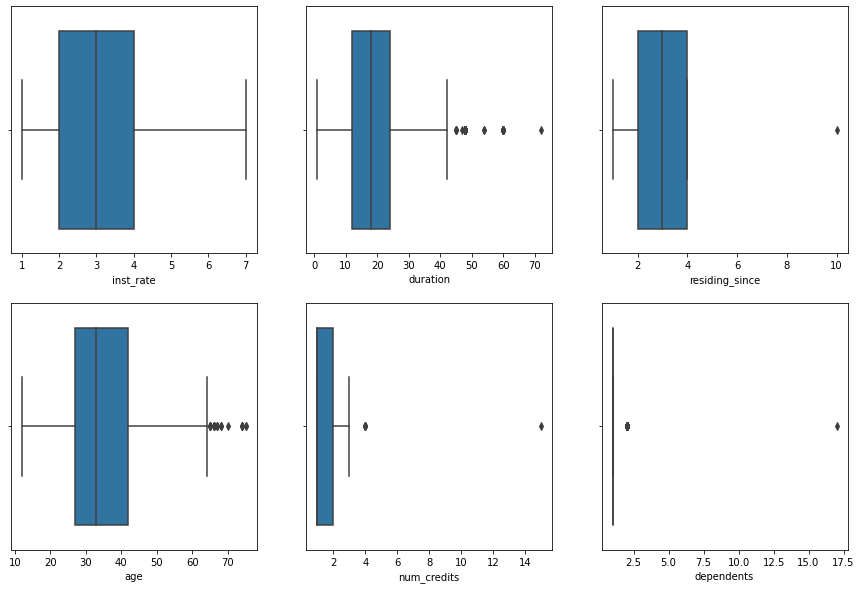

In [12]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

In [13]:
credit_df = credit_df[credit_df.duration <= 43]
credit_df = credit_df[credit_df.age <= 55]
credit_df = credit_df[credit_df.dependents <= 1]
# X = X[X.duration <= 43]

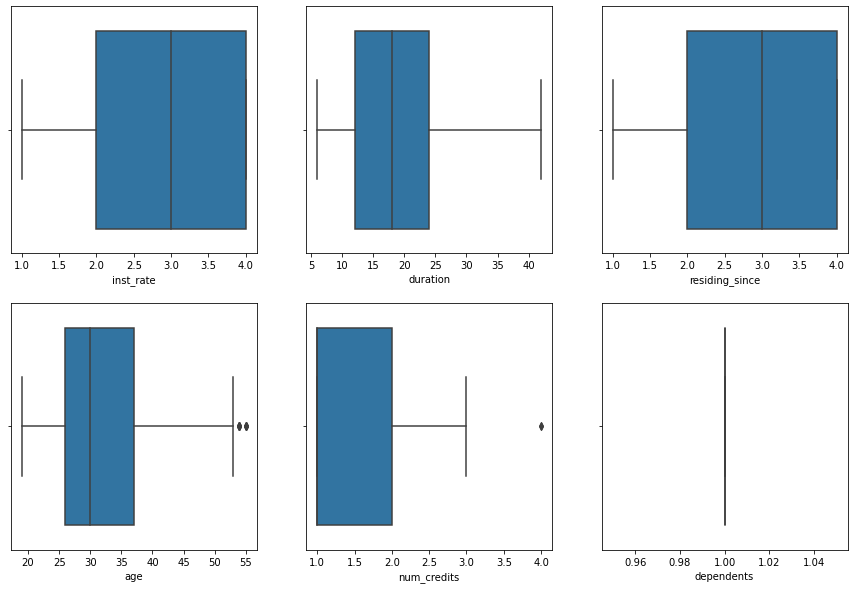

In [14]:
fig, axes = plt.subplots(2,3,figsize=(15,10))

sb.boxplot(x="inst_rate", data=credit_df, ax=axes[0, 0])
sb.boxplot(x="duration", data=credit_df, ax=axes[0, 1])
sb.boxplot(x="residing_since", data=credit_df, ax=axes[0, 2])
sb.boxplot(x="age", data=credit_df, ax=axes[1, 0])
sb.boxplot(x="num_credits", data=credit_df, ax=axes[1, 1])
sb.boxplot(x="dependents", data=credit_df, ax=axes[1, 2])


plt.show()

In [15]:
corr_analysis = credit_df.corr()

In [16]:
sb.set(rc={"figure.figsize":(50,17)})

<AxesSubplot:>

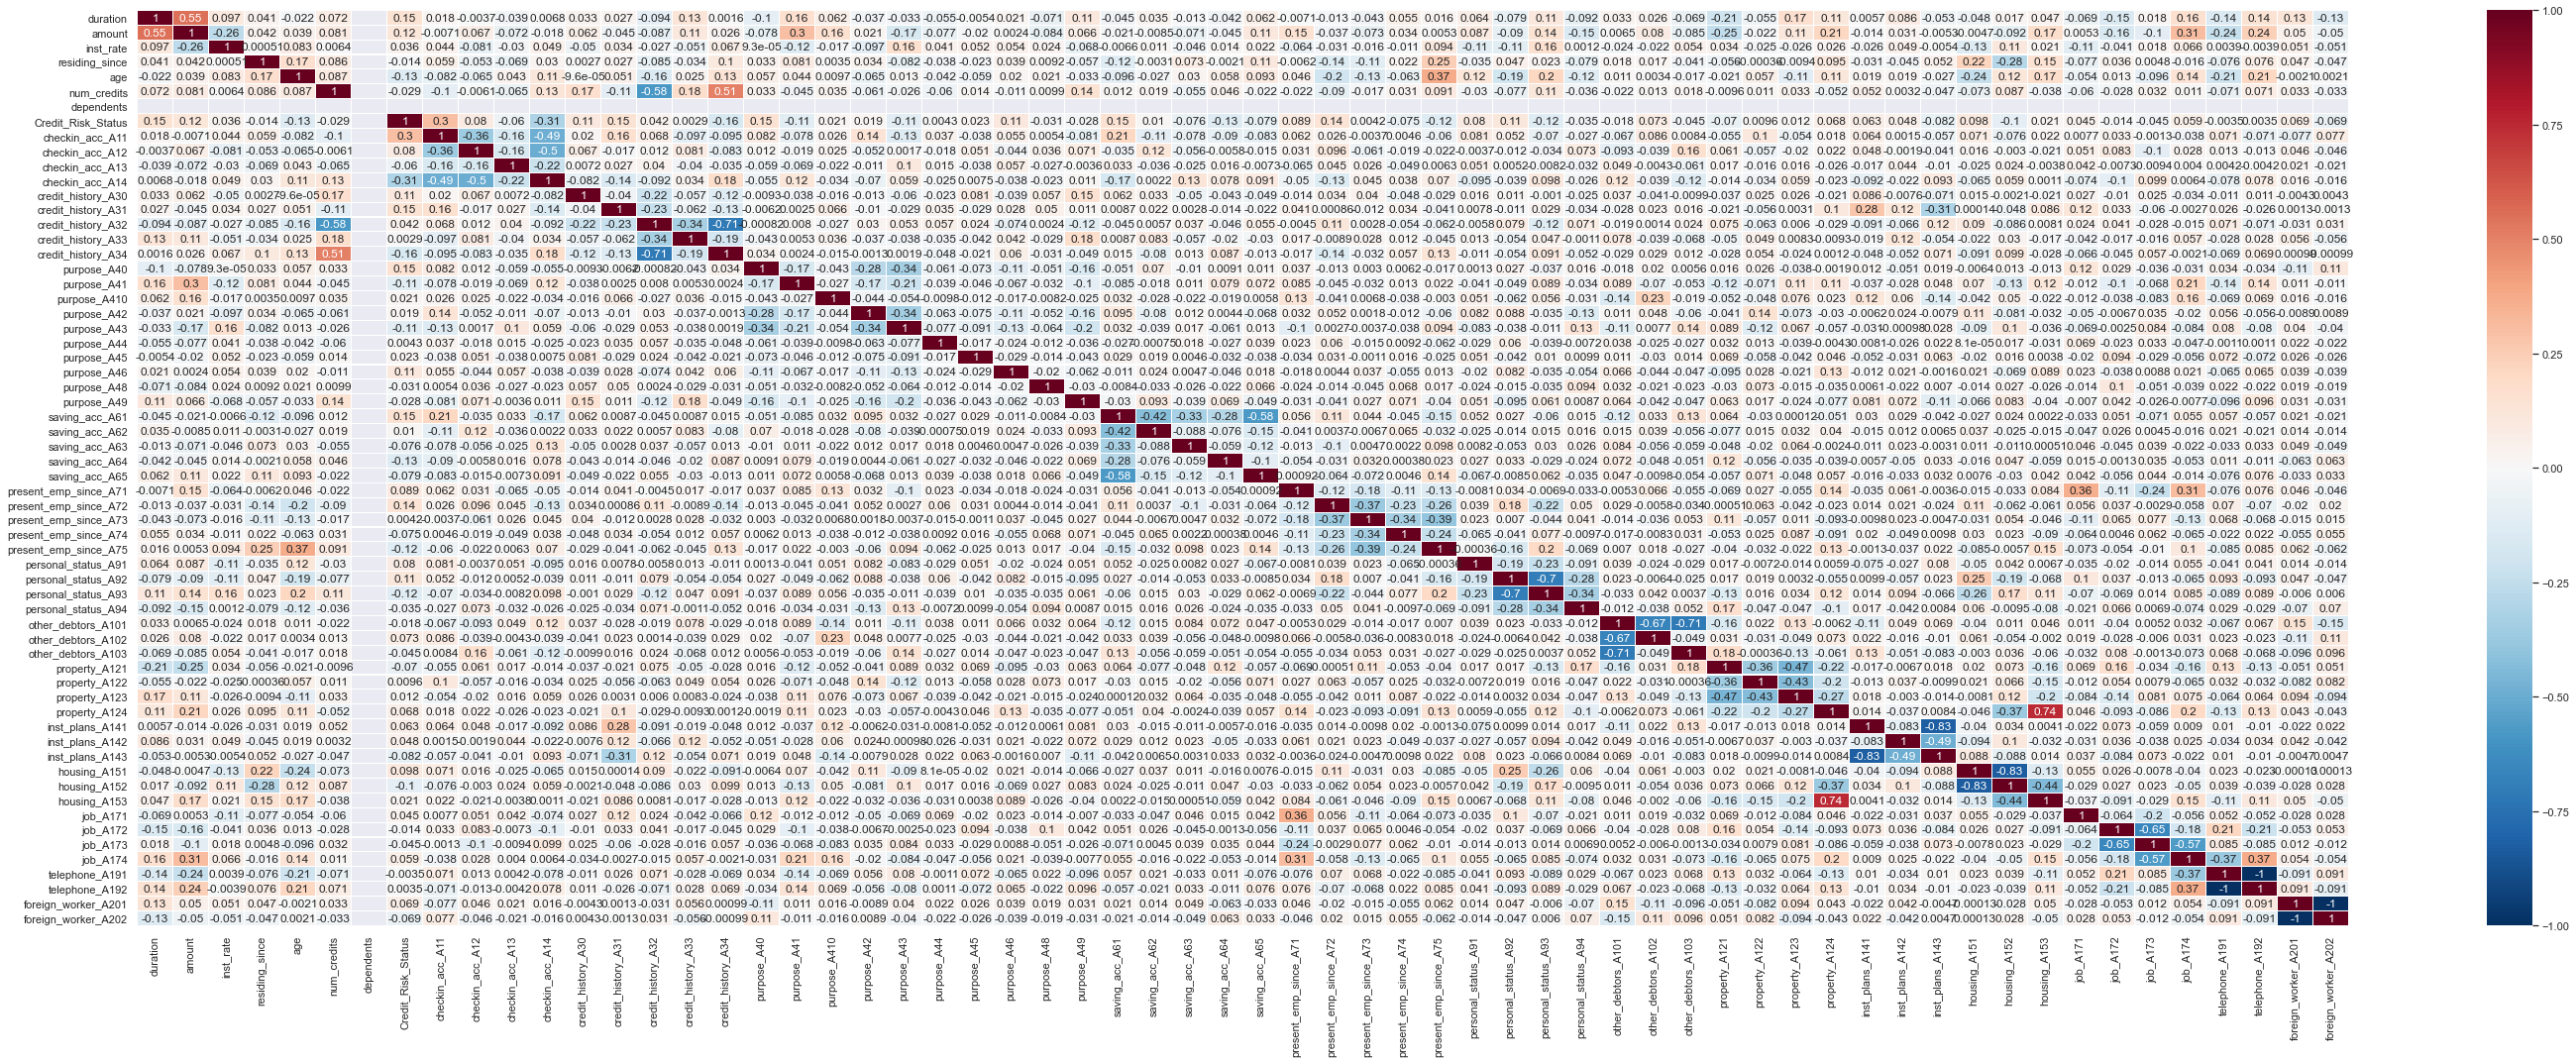

In [17]:
sb.heatmap(corr_analysis,
            xticklabels=corr_analysis.columns,
            yticklabels=corr_analysis.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.1)

Text(0.5, 0, 'Age in years')

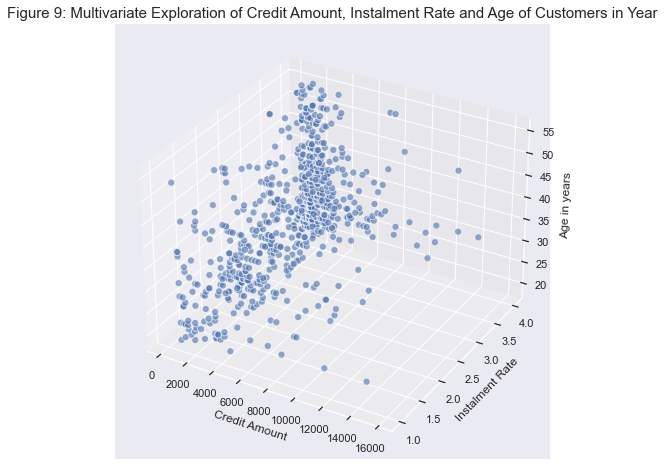

In [18]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
plt.title("Figure 9: Multivariate Exploration of Credit Amount, Instalment Rate and Age of Customers in Year", fontsize =15)

xs = credit_df['amount']
ys = credit_df['inst_rate']
zs = credit_df['age']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Credit Amount')
ax.set_ylabel('Instalment Rate')
ax.set_zlabel('Age in years')

In [19]:
max_duration = np.amax(credit_df["duration"])
max_amount = np.amax(credit_df["amount"])
max_inst_rate = np.amax(credit_df["inst_rate"])
max_residing_since = np.amax(credit_df["residing_since"])
max_dependents = np.amax(credit_df["dependents"])
max_age = np.amax(credit_df["age"])
max_num_credits = np.amax(credit_df["num_credits"])

In [20]:
credit_df["duration"] = credit_df["duration"]/max_duration
credit_df["amount"] = credit_df["amount"]/max_amount
credit_df["inst_rate"] = credit_df["inst_rate"]/max_inst_rate
credit_df["residing_since"] = credit_df["residing_since"]/max_residing_since
credit_df["dependents"] = credit_df["dependents"]/max_dependents
credit_df["age"] = credit_df["age"]/max_age
credit_df["num_credits"] = credit_df["num_credits"]/max_num_credits

In [21]:
Y = credit_df.Credit_Risk_Status - 1
X = credit_df.drop("Credit_Risk_Status", axis=1)

In [22]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.027, random_state = 2 )
print("Training Data Size: ", X_train.shape[0])
print("Testing Data Size: ", X_test.shape[0])

Training Data Size:  706
Testing Data Size:  20


In [23]:
X_train = np.array(X_train)
y_train = np.array(keras.utils.to_categorical(y_train, 2))
X_test = np.array(X_test)
y_test = np.array(keras.utils.to_categorical(y_test, 2))

print(X_train[:10])
print(y_train[:10])

[[0.28571429 0.02579303 0.75       0.75       0.76363636 0.5
  1.         0.         0.         1.         0.         0.
  1.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  0.         0.         0.         1.         0.         0.
  0.         1.         0.         0.         1.         0.
  0.         1.         0.         0.         0.         0.
  0.         1.         1.         0.         0.         0.
  0.         1.         0.         1.         0.         1.
  0.        ]
 [0.23809524 0.12133443 0.25       1.         0.69090909 0.25
  1.         0.         0.         0.         1.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         1.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.        

In [24]:
model = Sequential()

model.add(Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation="tanh"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation="softmax"))


model.compile(loss="categorical_crossentropy", optimizer="adamax", metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               15872     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 2

In [25]:
hist = model.fit(X_train, y_train, epochs=25, batch_size=100, validation_split=0.25,
                 shuffle=True)

Epoch 1/25
6/6 [==============================] - 2s 86ms/step - loss: 0.6912 - accuracy: 0.6314 - val_loss: 0.6662 - val_accuracy: 0.6497
Epoch 2/25
6/6 [==============================] - 0s 15ms/step - loss: 0.6396 - accuracy: 0.7164 - val_loss: 0.6677 - val_accuracy: 0.6497
Epoch 3/25
6/6 [==============================] - 0s 15ms/step - loss: 0.6109 - accuracy: 0.7108 - val_loss: 0.6523 - val_accuracy: 0.6497
Epoch 4/25
6/6 [==============================] - 0s 15ms/step - loss: 0.5840 - accuracy: 0.7259 - val_loss: 0.6399 - val_accuracy: 0.6497
Epoch 5/25
6/6 [==============================] - 0s 16ms/step - loss: 0.6116 - accuracy: 0.7164 - val_loss: 0.6319 - val_accuracy: 0.6497
Epoch 6/25
6/6 [==============================] - 0s 14ms/step - loss: 0.5913 - accuracy: 0.7259 - val_loss: 0.6301 - val_accuracy: 0.6497
Epoch 7/25
6/6 [==============================] - 0s 15ms/step - loss: 0.5840 - accuracy: 0.7278 - val_loss: 0.6276 - val_accuracy: 0.6497
Epoch 8/25
6/6 [===========

In [26]:
training_score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", training_score[1])
testing_score = model.evaluate(X_test, y_test)
print("\n Testing Accuracy:", testing_score[1])

23/23 [==============================] - 0s 2ms/step - loss: 0.4745 - accuracy: 0.7578

 Training Accuracy: 0.7577903866767883
1/1 [==============================] - 0s 44ms/step - loss: 0.5276 - accuracy: 0.6000

 Testing Accuracy: 0.6000000238418579


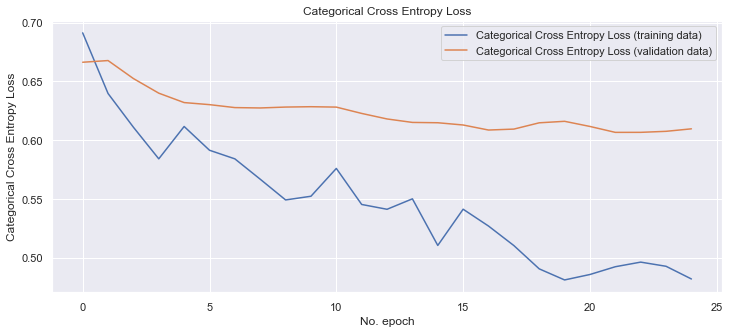

In [27]:
plt.figure(figsize=(12, 5))

plt.plot(hist.history['loss'], label='Categorical Cross Entropy Loss (training data)')
plt.plot(hist.history['val_loss'], label='Categorical Cross Entropy Loss (validation data)')
plt.title('Categorical Cross Entropy Loss')
plt.ylabel('Categorical Cross Entropy Loss')
plt.xlabel('No. epoch')
plt.legend(loc="upper right")
plt.show()

In [28]:
results = model.predict(X_test, verbose=1)

1/1 [==============================] - 0s 135ms/step


In [29]:
y_real = np.argmax(y_test, axis=-1)
print("Predicted Results: ")
y_real

Predicted Results: 


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [30]:
total = 0
# good = 0, bad = 1
for real, pred in zip(y_real, results):
    if real.any() == 0 and pred.any() == 1:
        total = total + 1
    elif real.any() == 1 and pred.any() == 0:
        total = total + 5
        
print("Final Score: ", total)

Final Score:  17


# Ridge Regression

In [31]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [32]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 30}
-0.16779594292533181


# Lasso Regression

In [33]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.011917439663613, tolerance: 0.01167287234042553
  model = cd_fast.enet_coordinate_descent(
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.8933575450848465, tolerance: 0.011672872340425532
  model = cd_fast.enet_coordinate_descent(
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.622826669929786, tolerance: 0.011884955752212389
  model = cd_fast.enet_coordinate_descent(
C:\Users\rajan\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: Converge

{'alpha': 0.001}
-0.1725580346583547


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.3, random_state=0)

In [35]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

C:\Users\rajan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

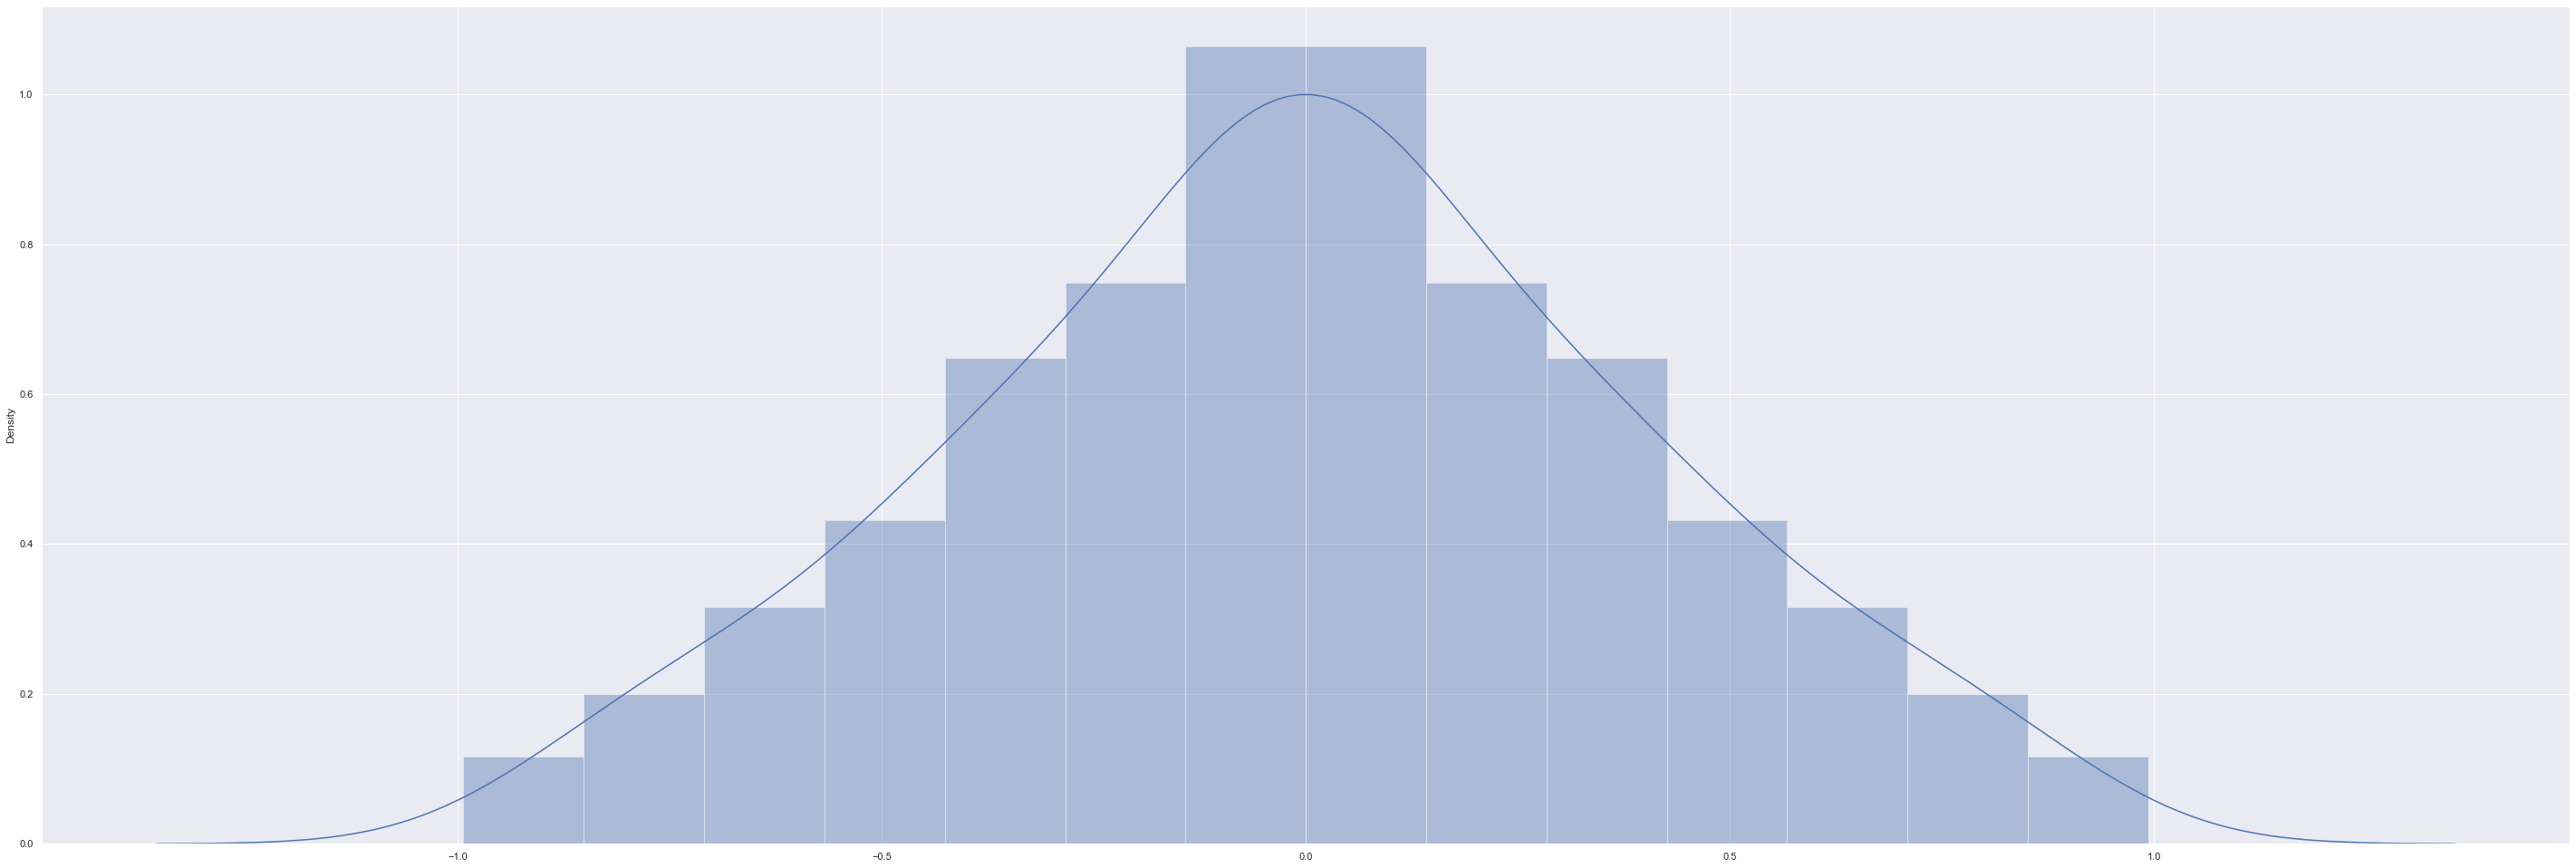

In [36]:
import seaborn as sns

sns.distplot(y_test-prediction_lasso)

C:\Users\rajan\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

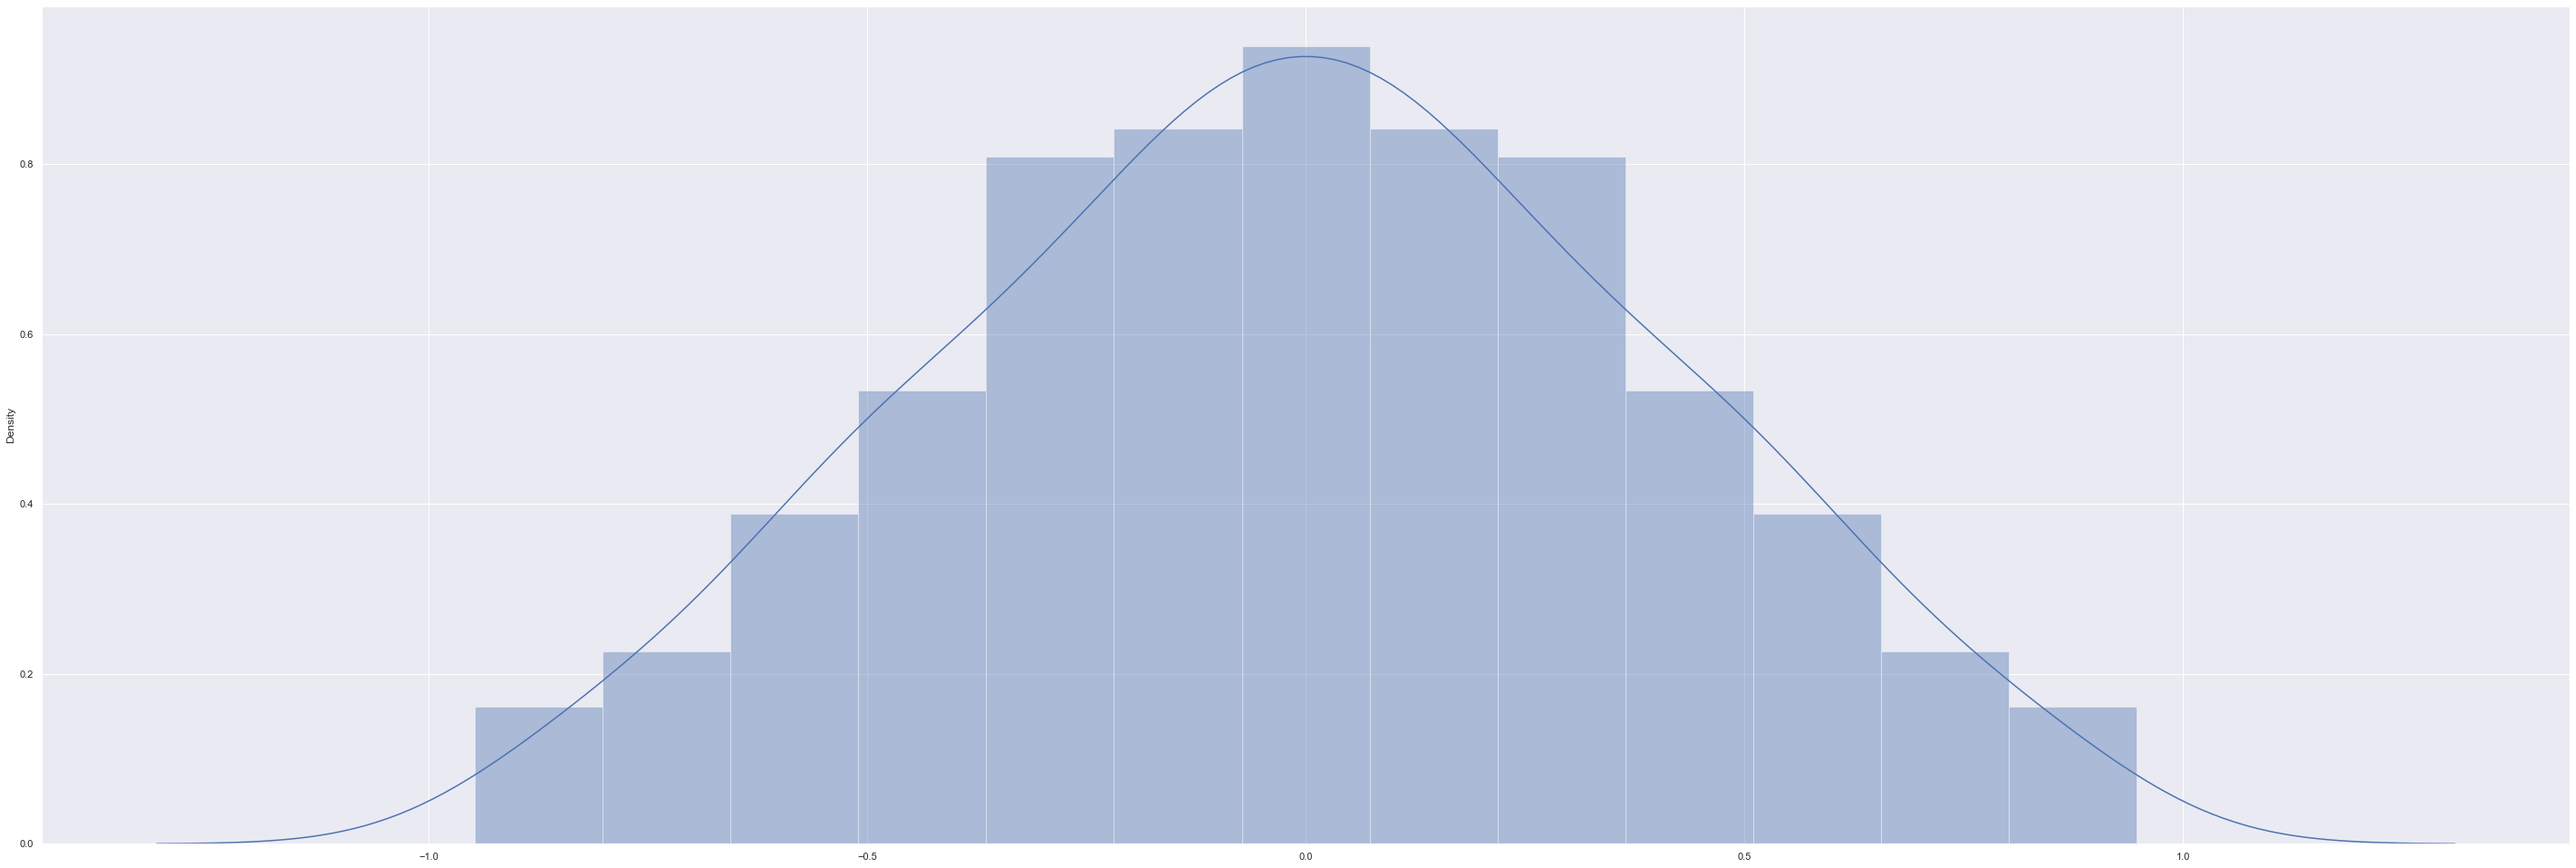

In [37]:
import seaborn as sns

sns.distplot(y_test-prediction_ridge)